***Квадратичная функция***

                      Методы второго порядка
Дано:
Целевая функция:        f(x, y) =  6*x**2 - 4*x*y + 8.94427190999916*x + 3*y**2 + 17.8885438199983*y + 22
Начальное приближение:  X =  [-2 -1]
Точность вычисления:    Eps =  0.01
Точка минимума:  [-2.23324551 -4.46366857]
Минимум:  -27.999832707820723
Количество итераций:  10
Количество вызовов:  480
Точка минимума:  [-2.23682869 -4.46909336]
Минимум:  -27.99995949767313
Количество итераций:  7
Количество вызовов:  337
Точка минимума:  [-2.23606799 -4.472136  ]
Минимум:  -28.00000000000003
Количество итераций:  4
Количество вызовов:  519

**********************************************************************************************************************************************************************
Методы			        ЦПС			      Хука - Дживса			    Розенброка
Xmin  		 [-2.23324551 -4.46366857] 		 [-2.23682869 -4.46909336] 	 [-2.23606799 -4.472136  ]
f(Xmin)			 -27.999832707820723 			 -27.99995949767313 		 -28.00000000000003
i			 10 	

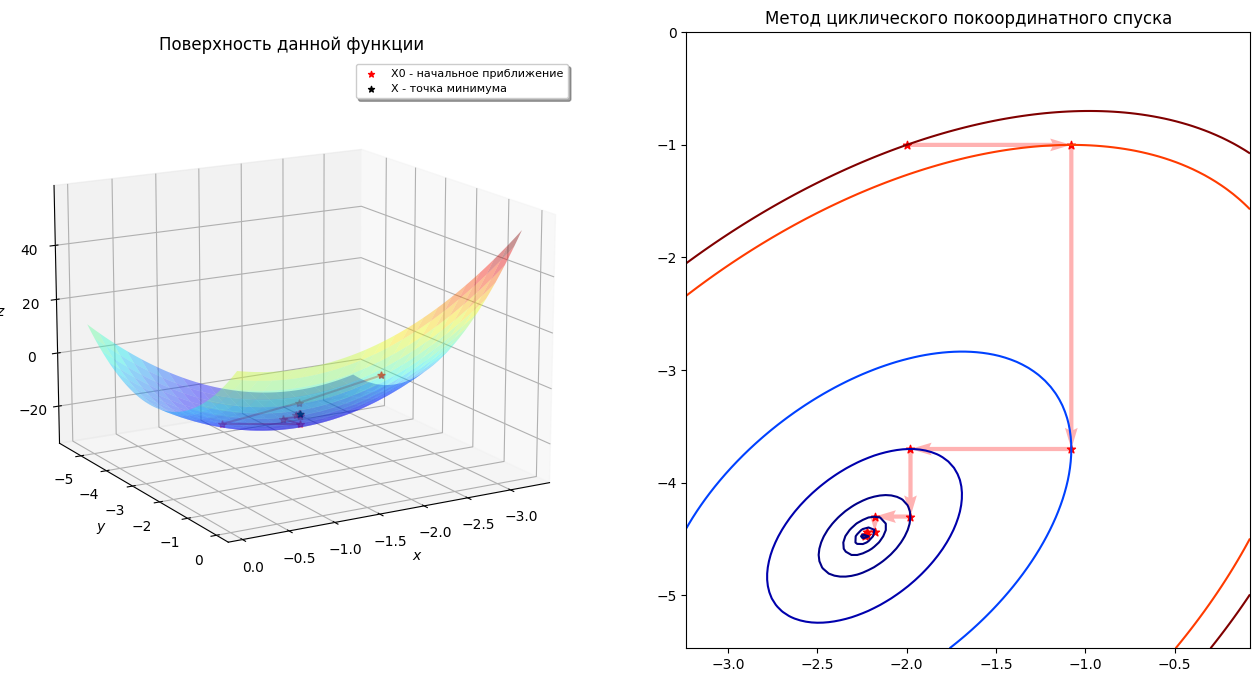

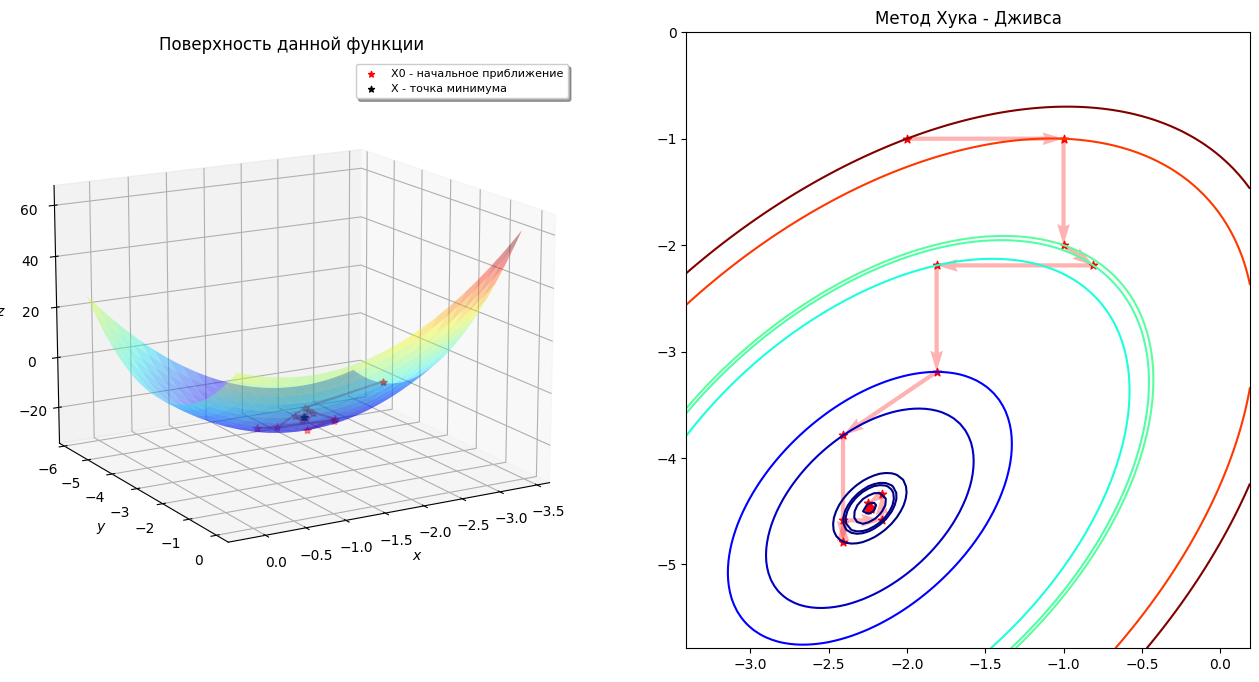

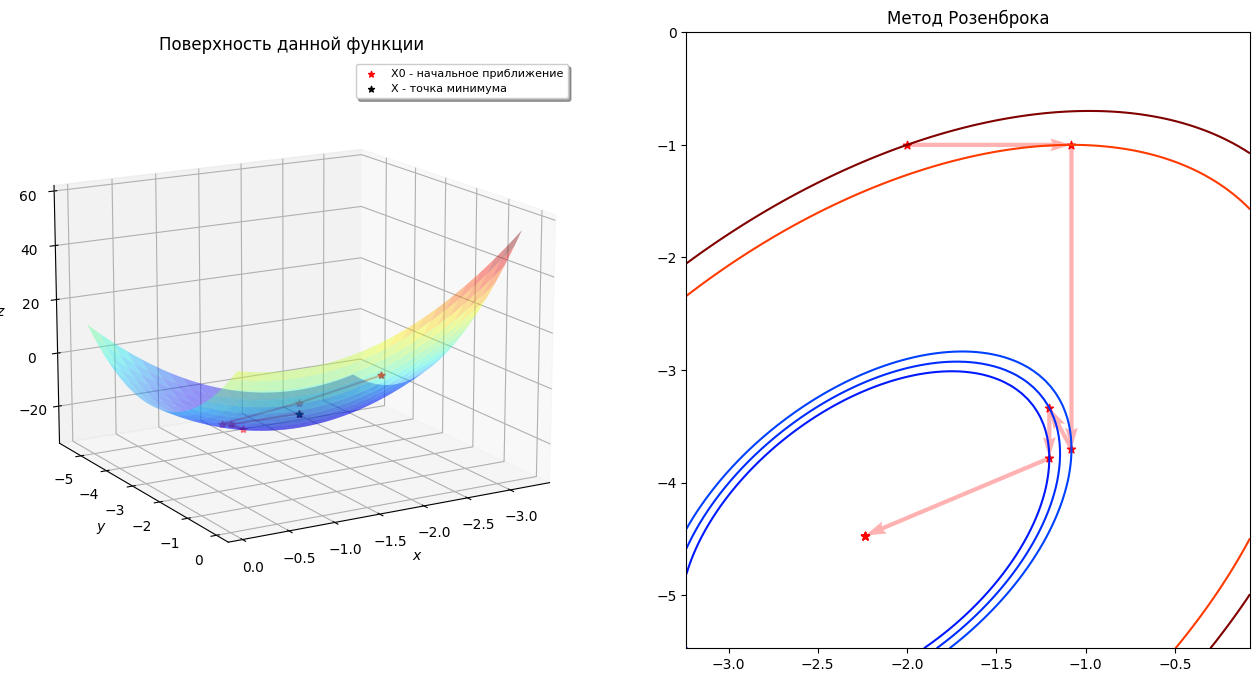

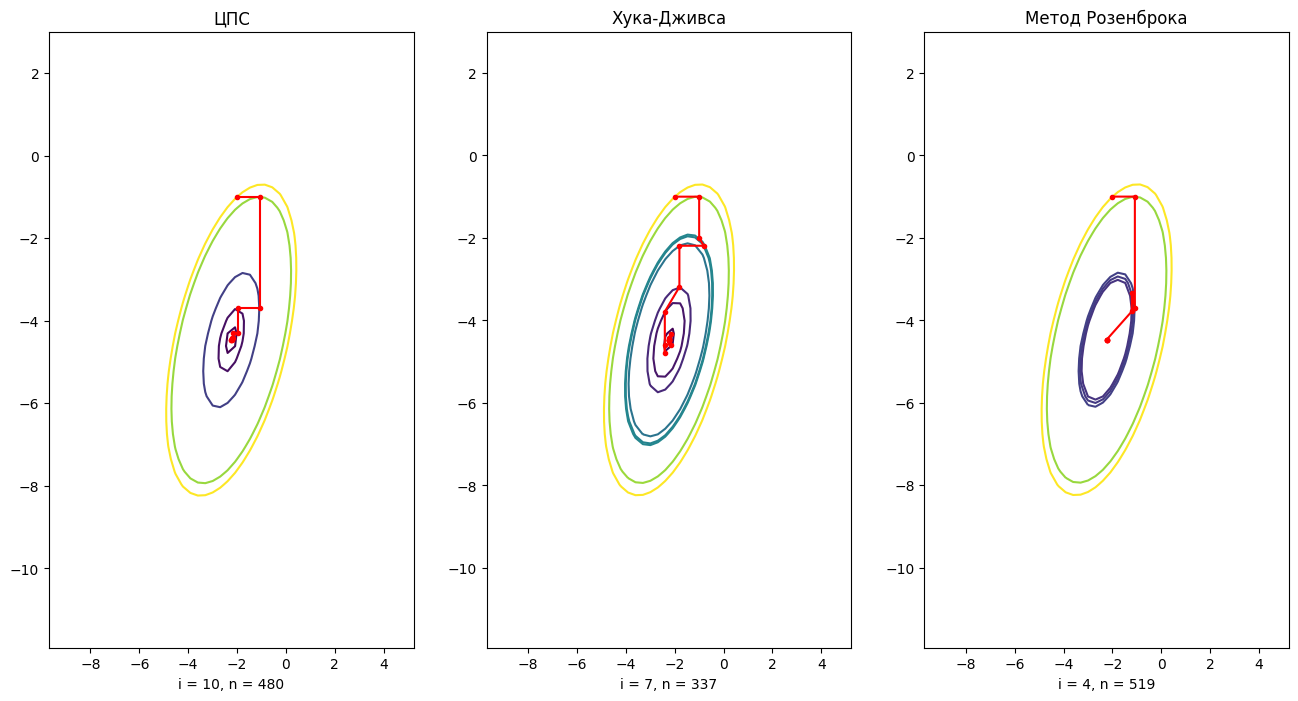

In [1]:
from ast import While
from cmath import sqrt
from unittest.util import _MIN_DIFF_LEN
from sympy.tensor.array import derive_by_array
from scipy import optimize
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt

# Параметры методов:
eps = 0.01
X0 = np.array([-2, -1])

# Функции
def f1(x, y): return 10*x**2-4*x*y+7*y**2-4*5**(1/2)*(5*x-y)-16
def f2(x, y): return 6*x**2-4*x*y+3*y**2+4*5**(1/2)*(x+2*y)+22
def f3(x, y): return 2*x**2 - 4*x*y+5*y**2-4*sqrt(5)*(x-y)+4
f = f2
x_sym, y_sym = sp.Symbol('x'), sp.Symbol('y')



# Метод циклического покоординатного спуска
def cyclic_coordinate_descent():
    def fun(X): return f(X[0], X[1])
    X_p, Y_p = np.empty(0), np.empty(0)

    X = X0
    X_p = np.append(X_p, X[0])
    Y_p = np.append(Y_p, X[1])
    e1 = np.array([1, 0])
    e2 = np.array([0, 1])
    i = n = 0
    while True:
        def phi_e1(kappa): return fun(X + kappa * e1)
        #kappa, n = golden_ratio(phi_e1, n)
        kappa, arg, k = optimize.golden(phi_e1, full_output=True)
        n += k
        Xk = X + kappa * e1
        X = Xk
        X_p = np.append(X_p, X[0])
        Y_p = np.append(Y_p, X[1])

        def phi_e2(kappa): return fun(X + kappa * e2)
        # kappa, n = golden_ratio(phi_e2, n)
        kappa, arg, k = optimize.golden(phi_e2, full_output=True)
        n += k
        Xk = X + kappa * e2
        X_p = np.append(X_p, Xk[0])
        Y_p = np.append(Y_p, Xk[1])
        i += 2
        if np.linalg.norm(Xk - X) < eps and (fun(Xk) - fun(X) < eps):
            break
        X = Xk
    return X, X_p, Y_p, i, n

#Метод Хука - Дживса
def HukaDgivsa():
    def fun(X): return f(X[0], X[1])
    X_p, Y_p = np.empty(0), np.empty(0)

    X = X_wave_k = X1 = X0
    j_f = fun(X1)

    X_p = np.append(X_p, X0[0])
    Y_p = np.append(Y_p, X0[1])
    
    e1 = np.array([1, 0])
    e2 = np.array([0, 1])
    b = np.array([1, 1])

    gamma = 2
    a = 2
    
    n = 0
    i = 1

    while True:
        #выбирает точку 2 от второго базисного вектора
        plus_f = fun(X1 + b[0] * e1)
        minus_f = fun(X1 - b[0] * e1)
    
        if (plus_f < j_f and plus_f <= minus_f):
            X2 = X1 + b[0] * e1
        elif (minus_f < j_f and minus_f < plus_f):
            X2 = X1 - b[0] * e1
        else:
            X2 = X1
        # print('X2 = ', X2)

        #выбирает точку 2 от второго базисного вектора
        plus_f = fun(X2 + b[1] * e2)
        minus_f = fun(X2 - b[1] * e2)
        j_f = fun(X2)

        if (plus_f < j_f and plus_f <= minus_f):
            X3 = X2 + b[1] * e2
        elif (minus_f < j_f and minus_f < plus_f):
            X3 = X2 - b[1] * e2
        else:
            X3 = X2
        # print('X3 = ', X3)
        n += 5
        
        #если точка оказалась прежней, уменьшаем шаг b*e_j
        if (X3 == X_wave_k).all():
            b = b / gamma
            # print(b)
            X1 = X_wave_k
            # print(X1)
            j_f = fun(X_wave_k)
            continue

        if (X2[0] != X1[0] or X2[1] != X1[1]):    
            X_p = np.append(X_p, X2[0])
            Y_p = np.append(Y_p, X2[1])
        if (X2[0] != X3[0] or X2[1] != X3[1]):   
            X_p = np.append(X_p, X3[0])
            Y_p = np.append(Y_p, X3[1])

        if np.linalg.norm(X3 - X_wave_k) < eps:
            break
        
        #одномерная оптимизация
        def phi(a): return fun(X_wave_k + a * (X3 - X_wave_k))
        a, arg, k = optimize.golden(phi, full_output=True)
        n += k

        #точка
        X = X1 + a * (X3 - X1)
        # print('X = ', X)
        X_p = np.append(X_p, X[0])
        Y_p = np.append(Y_p, X[1])
        X1 = X_wave_k = X
        j_f = fun(X)
        i += 1
        # print('i = ', i)
    return X, X_p, Y_p, i, n
 

#Метод Розенброка
def Rozenbrok():
    def fun(X): return f(X[0], X[1])
    X_p, Y_p = np.empty(0), np.empty(0)

    X_wave_k = X1 = X0

    X_p = np.append(X_p, X0[0])
    Y_p = np.append(Y_p, X0[1])
    
    p1 = np.array([1, 0])
    p2 = np.array([0, 1])
    
    n = 0
    i = 1

    while True:
        def ksi_1(kappa1): return fun(X1 + kappa1 * p1)
        kappa1, arg, k = optimize.golden(ksi_1, full_output=True)
        n += k
        X2 = X1 + kappa1 * p1
        X_p = np.append(X_p, X2[0])
        Y_p = np.append(Y_p, X2[1])

        def ksi_2(kappa2): return fun(X2 + kappa2 * p2)
        kappa2, arg, k = optimize.golden(ksi_2, full_output=True)
        n += k
        X3 = X2 + kappa2 * p2

        X = X3
        X_p = np.append(X_p, X[0])
        Y_p = np.append(Y_p, X[1])

        if np.linalg.norm(X - X1) < eps:
            break

        
        if kappa1 == 0:
            a1 = p1
        else:
            a1 = kappa1 * p1 + kappa2 * p2

        if kappa2 == 0:
            a2 = p2
        else:
            a2 = kappa2 * p2

        b1 = a1
        b2 = a2 - np.dot(a2, p1) * p1

        p1 = b1 / np.linalg.norm(b1)
        p2 = b2 / np.linalg.norm(b2) 

        X1 = X
        i += 1
    return X, X_p, Y_p, i, n


# 3D и линии уровня двух графиков
def DrawSurfContour(X2, X3, X4, X2_p, Y2_p, i1, n1, X3_p, Y3_p, i2, n2, X4_p, Y4_p, i3, n3):
    fig = plt.figure(figsize=(16, 8))
    # fig.canvas.manager.full_screen_toggle()

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    fig.canvas.manager.set_window_title('Прямой поиск')

    delta = max(abs(X2[0] - X0[0]), abs(X2[1] - X0[1])) + 4
    X, Y = np.meshgrid(np.linspace(X2[0] - delta, X2[0] + delta, 50),
                       np.linspace(X2[1] - delta, X2[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes1.contour(X, Y, Z, levels=Val(X2_p, Y2_p))
    axes1.plot(X2_p, Y2_p, marker='o', markersize=3, color='red')
    axes1.set_xlabel('i = ' +str(i1) + ', n = ' + str(n1))
    axes1.set_title('ЦПС')

    delta = max(abs(X3[0] - X0[0]), abs(X3[1] - X0[1])) + 4
    X, Y = np.meshgrid(np.linspace(X3[0] - delta, X3[0] + delta, 50),
                       np.linspace(X3[1] - delta, X3[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes2.contour(X, Y, Z, levels=Val(X3_p, Y3_p))
    axes2.plot(X3_p, Y3_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('i = ' +str(i2) + ', n = ' + str(n2))
    axes2.set_title('Хука-Дживса')

    delta = max(abs(X4[0] - X0[0]), abs(X4[1] - X0[1])) + 4
    X, Y = np.meshgrid(np.linspace(X4[0] - delta, X4[0] + delta, 50),
                       np.linspace(X4[1] - delta, X4[1] + delta, 50))
    # X, Y = np.meshgrid(X_p2, Y_p2)
    Z = f(X, Y)
    axes3.contour(X, Y, Z, levels=Val(X4_p, Y4_p))
    axes3.plot(X4_p, Y4_p, marker='o', markersize=3, color='red')
    axes3.set_xlabel('i = ' +str(i3) + ', n = ' + str(n3))
    axes3.set_title('Метод Розенброка')

# 3D и линии уровня одного графика
def Draw(X_, X_p, Y_p, k):

    delta = 1
    X, Y = np.meshgrid(np.linspace(min(X_p) - delta, max(X_p) + delta,  100),
                       np.linspace(min(Y_p) - delta, max(Y_p) + delta, 100))
    Z = f(X, Y)

    # Angles needed for quiver plot
    anglesx = X_p[1:] - X_p[:-1]
    anglesy = Y_p[1:] - Y_p[:-1]

    fig = plt.figure(figsize=(16, 8))

    # Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=5, cstride=5,
                    cmap='jet', alpha=.4, edgecolor='none')
    ax.plot(X_p, Y_p, f(X_p, Y_p), color='r', marker='*', alpha=.4)

    # ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor = 'none')
    ax.scatter(X0[0], X0[1], f(X0[0], X0[1]), s=20, marker='*',
               c='red', label='X0 - начальное приближение')
    ax.scatter(X_[0], X_[1], f(X_[0], X_[1]), s=20, marker='*',
               c='black', label='X - точка минимума')
    ax.legend(shadow=True, fontsize=8)
    ax.view_init(15, 60)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.set_title('Поверхность данной функции')

    # Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(X, Y, Z, levels=Val(X_p, Y_p), cmap='jet')

    # Plotting the iterations and intermediate values
    ax.scatter(X_p, Y_p, color='r', marker='*')
    ax.quiver(X_p[:-1], Y_p[:-1], anglesx, anglesy,
              scale_units='xy', angles='xy', scale=1, color='r', alpha=.3)
    if k == 1:
        fig.canvas.manager.set_window_title(
            'Метод циклического покоординатного спуска')
        ax.set_title('Метод циклического покоординатного спуска')
    elif k == 2:
        fig.canvas.manager.set_window_title('Метод Хука - Дживса')
        ax.set_title('Метод Хука - Дживса')
    elif k == 3:
        fig.canvas.manager.set_window_title('Метод Розенброка')
        ax.set_title('Метод Розенброка')

# Таблица точек и значений
def DrawPoints(X_p, Y_p):
    for x in range(len(X_p)):
        print('X = [', '%.6f' % X_p[x], ' ', '%.6f' %
              Y_p[x], ']', '\tf = ', '%.6f' % f(X_p[x], Y_p[x]))

# Значения функции
def Val(X_p, Y_p):
    Value = []
    for i in range(len(X_p)):
        Value.insert(0, f(X_p[i], Y_p[i]))
    return np.sort(Value)


print(" " * 20, ' Методы второго порядка')
print('Дано:')
print('Целевая функция:        f(x, y) = ', f(x_sym, y_sym))
print('Начальное приближение:  X = ', X0)
print('Точность вычисления:    Eps = ', eps)

X1, X1_p, Y1_p, i1, n1 = cyclic_coordinate_descent()
print('Точка минимума: ', X1)
print('Минимум: ', f(X1[0], X1[1]))
print('Количество итераций: ', i1)
print('Количество вызовов: ', n1)
# DrawPoints(X1_p, Y1_p)
Draw(X1, X1_p, Y1_p, 1)


X2, X2_p, Y2_p, i2, n2 = HukaDgivsa()
print('Точка минимума: ', X2)
print('Минимум: ', f(X2[0], X2[1]))
print('Количество итераций: ', i2)
print('Количество вызовов: ', n2)
# DrawPoints(X2_p, Y2_p)
Draw(X2, X2_p, Y2_p, 2)


X3, X3_p, Y3_p, i3, n3 = Rozenbrok()
print('Точка минимума: ', X3)
print('Минимум: ', f(X3[0], X3[1]))
print('Количество итераций: ', i3)
print('Количество вызовов: ', n3)
# DrawPoints(X3_p, Y3_p)
Draw(X3, X3_p, Y3_p, 3)


X1, X1_p, Y1_p, i1, n1= cyclic_coordinate_descent()
X2, X2_p, Y2_p, i2, n2 = HukaDgivsa()
X3, X3_p, Y3_p, i3, n3 = Rozenbrok()
# DrawPoints(X1_p, Y1_p)
# DrawPoints(X2_p, Y2_p)
# DrawPoints(X3_p, Y3_p)
print()
print('**********************************************************************************************************************************************************************')
print('Методы\t\t\t', '       ЦПС\t\t\t', '     Хука - Дживса\t\t\t', '   Розенброка')
print('Xmin  \t\t',  X1, '\t\t', X2, '\t', X3)
print('f(Xmin)\t\t\t', f(X1[0], X1[1]), '\t\t\t',
      f(X2[0], X2[1]), '\t\t', f(X3[0], X3[1]))
print('i\t\t\t', i1, '\t\t\t\t\t', i2, '\t\t\t\t\t', i3)
print('n\t\t\t', n1, '\t\t\t\t\t', n2, '\t\t\t\t\t', n3)

print('**********************************************************************************************************************************************************************')
DrawSurfContour(X1, X2, X3, X1_p, Y1_p, i1, n1, X2_p, Y2_p, i2, n2, X3_p, Y3_p, i3, n3)


plt.show()


***Розенброк***

                      Методы второго порядка
Дано:
Целевая функция:        f(x, y) =  (x - 1)**2 + 30*(x**2 - y)**2
Начальное приближение:  X =  [-40 -40]
Точность вычисления:    Eps =  0.01

**********************************************************************************************************************************************************************
Методы			        ЦПС			      Хука - Дживса			    Розенброка
Xmin  		 [0.62943431 0.38637541] 		 [0.99999993 0.99999993] 	 [0.99999031 0.99998049]
f(Xmin)			 0.14020727426943963 			 1.6583412967516052e-13 		 9.436332491603159e-11
i			 44 					 2 					 13
n			 2331 					 171 					 1363
**********************************************************************************************************************************************************************


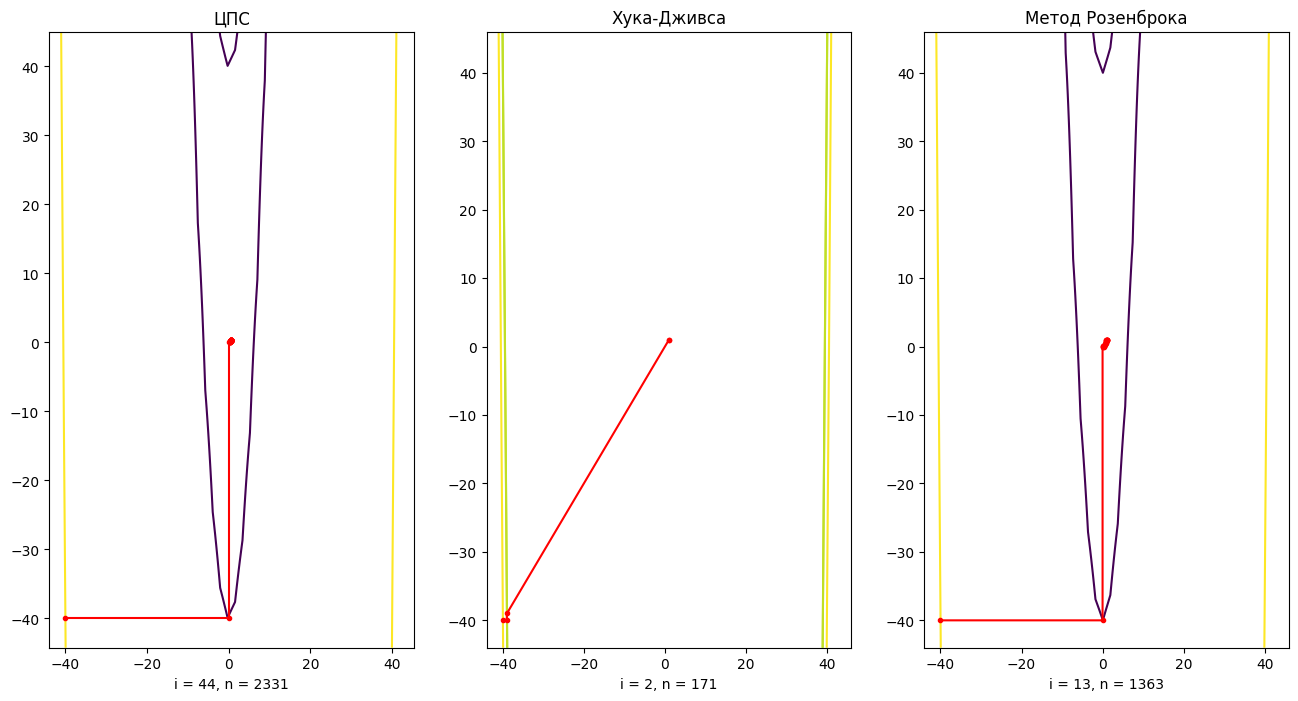

In [4]:
from ast import While
from cmath import sqrt
from matplotlib.colors import LinearSegmentedColormap
from sympy.tensor.array import derive_by_array
from scipy import optimize
from operator import mod
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt

# Параметры методов:
alpha = 30
eps = 0.01
X0 = np.array([-4, -4])

# Функции
def f(x, y): return alpha*(x**2-y)**2 + (x - 1)**2
x_sym, y_sym = sp.Symbol('x'), sp.Symbol('y')

#Метод золотого сечения
def golden_ratio(phi, n, b = 2, a = 0, e = eps):
    tau = (math.sqrt(5) + 1) / 2
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Ak + ((Bk - Ak) - (Bk - Ak) / tau)
    Xk2 = Ak + (Bk - Ak) / tau
    y1, y2 = phi(Xk1), phi(Xk2)
    n += 2
    while lk >= e/1000:
        if y1 >= y2:
            Ak = Xk1
            Xk1 = Xk2
            Xk2 = Ak + Bk - Xk1
            y1 = y2
            y2 = phi(Xk2)
            n +=1
        else:
            Bk = Xk2
            Xk2 = Xk1
            Xk1 = Ak + Bk - Xk2
            y2 = y1
            y1 = phi(Xk1)
            n +=1
        lk = Bk - Ak
    return (Ak + Bk) / 2, n

# Метод циклического покоординатного спуска
def cyclic_coordinate_descent():
    def fun(X): return f(X[0], X[1])
    X_p, Y_p = np.empty(0), np.empty(0)

    X = X0
    X_p = np.append(X_p, X[0])
    Y_p = np.append(Y_p, X[1])
    e1 = np.array([1, 0])
    e2 = np.array([0, 1])
    i = n = 0
    while True:
        def phi_e1(kappa): return fun(X + kappa * e1)
        #kappa, n = golden_ratio(phi_e1, n)
        kappa, arg, k = optimize.golden(phi_e1,brack=(0,2), full_output=True)
        n += k
        Xk = X + kappa * e1
        X = Xk
        X_p = np.append(X_p, X[0])
        Y_p = np.append(Y_p, X[1])

        def phi_e2(kappa): return fun(X + kappa * e2)
        # kappa, n = golden_ratio(phi_e2, n)
        kappa, arg, k = optimize.golden(phi_e2,brack=(0,2), full_output=True)
        n += k
        Xk = X + kappa * e2
        X_p = np.append(X_p, Xk[0])
        Y_p = np.append(Y_p, Xk[1])
        i += 2
        if (np.linalg.norm(Xk - X) < eps and fun(Xk) - fun(X) < eps):
            break
        X = Xk
    return X, X_p, Y_p, i, n

#Метод Хука - Дживса
def HukaDgivsa():
    def fun(X): return f(X[0], X[1])
    X_p, Y_p = np.empty(0), np.empty(0)

    X = X_wave_k = X1 = X0
    j_f = fun(X1)

    X_p = np.append(X_p, X0[0])
    Y_p = np.append(Y_p, X0[1])
    
    e1 = np.array([1, 0])
    e2 = np.array([0, 1])
    b = np.array([1, 1])

    gamma = 2
    a = 2
    
    n = 0
    i = 1

    while True:
        #выбирает точку 2 от второго базисного вектора
        plus_f = fun(X1 + b[0] * e1)
        minus_f = fun(X1 - b[0] * e1)
    
        if (plus_f < j_f and plus_f <= minus_f):
            X2 = X1 + b[0] * e1
        elif (minus_f < j_f and minus_f < plus_f):
            X2 = X1 - b[0] * e1
        else:
            X2 = X1
        # print('X2 = ', X2)

        #выбирает точку 2 от второго базисного вектора
        plus_f = fun(X2 + b[1] * e2)
        minus_f = fun(X2 - b[1] * e2)
        j_f = fun(X2)

        if (plus_f < j_f and plus_f <= minus_f):
            X3 = X2 + b[1] * e2
        elif (minus_f < j_f and minus_f < plus_f):
            X3 = X2 - b[1] * e2
        else:
            X3 = X2
        # print('X3 = ', X3)
        n += 5
        
        #если точка оказалась прежней, уменьшаем шаг b*e_j
        if (X3 == X_wave_k).all():
            b = b / gamma
            # print(b)
            X1 = X_wave_k
            # print(X1)
            j_f = fun(X_wave_k)
            continue

        if (X2[0] != X1[0] or X2[1] != X1[1]):    
            X_p = np.append(X_p, X2[0])
            Y_p = np.append(Y_p, X2[1])
        if (X2[0] != X3[0] or X2[1] != X3[1]):   
            X_p = np.append(X_p, X3[0])
            Y_p = np.append(Y_p, X3[1])

        if np.linalg.norm(X3 - X_wave_k) < eps:
            break
        
        #одномерная оптимизация
        def phi(a): return fun(X_wave_k + a * (X3 - X_wave_k))
        a, arg, k = optimize.golden(phi, full_output=True)
        n += k

        #точка
        X = X1 + a * (X3 - X1)
        # print('X = ', X)
        X_p = np.append(X_p, X[0])
        Y_p = np.append(Y_p, X[1])
        X1 = X_wave_k = X
        j_f = fun(X)
        i += 1
        # print('i = ', i)
    return X, X_p, Y_p, i, n
 
#Метод Розенброка
def Rozenbrok():
    def fun(X): return f(X[0], X[1])
    X_p, Y_p = np.empty(0), np.empty(0)

    X_wave_k = X1 = X0

    X_p = np.append(X_p, X0[0])
    Y_p = np.append(Y_p, X0[1])
    
    p1 = np.array([1, 0])
    p2 = np.array([0, 1])
    
    n = 0
    i = 1

    while True:
        def ksi_1(kappa1): return fun(X1 + kappa1 * p1)
        kappa1, arg, k = optimize.golden(ksi_1,brack=(0,2), full_output=True)
        n += k
        X2 = X1 + kappa1 * p1
        X_p = np.append(X_p, X2[0])
        Y_p = np.append(Y_p, X2[1])

        def ksi_2(kappa2): return fun(X2 + kappa2 * p2)
        kappa2, arg, k = optimize.golden(ksi_2,brack=(0,2), full_output=True)
        n += k
        X3 = X2 + kappa2 * p2

        X = X3
        X_p = np.append(X_p, X[0])
        Y_p = np.append(Y_p, X[1])

        if np.linalg.norm(X - X1) < eps:
            break

        
        if kappa1 == 0:
            a1 = p1
        else:
            a1 = kappa1 * p1 + kappa2 * p2

        if kappa2 == 0:
            a2 = p2
        else:
            a2 = kappa2 * p2

        b1 = a1
        b2 = a2 - np.dot(a2, p1) * p1

        p1 = b1 / np.linalg.norm(b1)
        p2 = b2 / np.linalg.norm(b2) 

        X1 = X
        i += 1
    return X, X_p, Y_p, i, n


# 3D и линии уровня двух графиков
def DrawSurfContour(X2, X3, X4, X2_p, Y2_p, i1, n1, X3_p, Y3_p, i2, n2, X4_p, Y4_p, i3, n3):
    fig = plt.figure(figsize=(16, 8))
    # fig.canvas.manager.full_screen_toggle()

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    fig.canvas.manager.set_window_title('Прямой поиск')

    delta = max(abs(X2[0] - X0[0]), abs(X2[1] - X0[1])) + 4
    X, Y = np.meshgrid(np.linspace(X2[0] - delta, X2[0] + delta, 50),
                       np.linspace(X2[1] - delta, X2[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes1.contour(X, Y, Z, levels=Val(X2_p, Y2_p))
    axes1.plot(X2_p, Y2_p, marker='o', markersize=3, color='red')
    axes1.set_xlabel('i = ' +str(i1) + ', n = ' + str(n1))
    axes1.set_title('ЦПС')

    delta = max(abs(X3[0] - X0[0]), abs(X3[1] - X0[1])) + 4
    X, Y = np.meshgrid(np.linspace(X3[0] - delta, X3[0] + delta, 50),
                       np.linspace(X3[1] - delta, X3[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes2.contour(X, Y, Z, levels=Val(X3_p, Y3_p))
    axes2.plot(X3_p, Y3_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('i = ' +str(i2) + ', n = ' + str(n2))
    axes2.set_title('Хука-Дживса')

    delta = max(abs(X4[0] - X0[0]), abs(X4[1] - X0[1])) + 4
    X, Y = np.meshgrid(np.linspace(X4[0] - delta, X4[0] + delta, 50),
                       np.linspace(X4[1] - delta, X4[1] + delta, 50))
    # X, Y = np.meshgrid(X_p2, Y_p2)
    Z = f(X, Y)
    axes3.contour(X, Y, Z, levels=Val(X4_p, Y4_p))
    axes3.plot(X4_p, Y4_p, marker='o', markersize=3, color='red')
    axes3.set_xlabel('i = ' +str(i3) + ', n = ' + str(n3))
    axes3.set_title('Метод Розенброка')


# 3D и линии уровня одного графика
def Draw(X_, X_p, Y_p, k):

    delta = max(abs(X_[0] - X0[0]), abs(X_[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X_[0] - delta, X_[0] + delta,  100),
                       np.linspace(X_[1] - delta, X_[1] + delta, 100))
    Z = f(X, Y)

    # Angles needed for quiver plot
    anglesx = X_p[1:] - X_p[:-1]
    anglesy = Y_p[1:] - Y_p[:-1]

    fig = plt.figure(figsize=(16, 8))

    # Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=5, cstride=5,
                    cmap='jet', alpha=.4, edgecolor='none')
    ax.plot(X_p, Y_p, f(X_p, Y_p), color='r', marker='*', alpha=.4)

    # ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor = 'none')
    ax.scatter(X0[0], X0[1], f(X0[0], X0[1]), s=20, marker='*',
               c='red', label='X0 - начальное приближение')
    ax.scatter(X_[0], X_[1], f(X_[0], X_[1]), s=20, marker='*',
               c='black', label='X - точка минимума')
    ax.legend(shadow=True, fontsize=8)
    ax.view_init(15, 60)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.set_title('Поверхность данной функции')

    # Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(X, Y, Z, levels=Val(X_p, Y_p), cmap='jet')

    # Plotting the iterations and intermediate values
    ax.scatter(X_p, Y_p, color='r', marker='*')
    ax.quiver(X_p[:-1], Y_p[:-1], anglesx, anglesy,
              scale_units='xy', angles='xy', scale=1, color='r', alpha=.3)
    if k == 1:
        fig.canvas.manager.set_window_title(
            'Метод циклического покоординатного спуска')
        ax.set_title('Метод циклического покоординатного спуска')
    elif k == 2:
        fig.canvas.manager.set_window_title('Метод Хука - Дживса')
        ax.set_title('Метод Хука - Дживса')
    elif k == 3:
        fig.canvas.manager.set_window_title('Метод Розенброка')
        ax.set_title('Метод Розенброка')

# Таблица точек и значений
def DrawPoints(X_p, Y_p):
    for x in range(len(X_p)):
        print('X = [', '%.6f' % X_p[x], ' ', '%.6f' %
              Y_p[x], ']', '\tf = ', '%.6f' % f(X_p[x], Y_p[x]))

# Значения функции
def Val(X_p, Y_p):
    Value = []
    for i in range(len(X_p)):
        Value.insert(0, f(X_p[i], Y_p[i]))
    return np.sort(Value)


print(" " * 20, ' Методы второго порядка')
print('Дано:')
print('Целевая функция:        f(x, y) = ', f(x_sym, y_sym))
print('Начальное приближение:  X = ', X0)
print('Точность вычисления:    Eps = ', eps)

# X1, X1_p, Y1_p, i1, n1 = cyclic_coordinate_descent()
# print('Точка минимума: ', X1)
# print('Минимум: ', f(X1[0], X1[1]))
# print('Количество итераций: ', i1)
# print('Количество вызовов: ', n1)
# # DrawPoints(X1_p, Y1_p)
# Draw(X1, X1_p, Y1_p, 1)


# X2, X2_p, Y2_p, i2, n2 = HukaDgivsa()
# print('Точка минимума: ', X2)
# print('Минимум: ', f(X2[0], X2[1]))
# print('Количество итераций: ', i2)
# print('Количество вызовов: ', n2)
# # DrawPoints(X2_p, Y2_p)
# Draw(X2, X2_p, Y2_p, 2)


# X3, X3_p, Y3_p, i3, n3 = Rozenbrok()
# print('Точка минимума: ', X3)
# print('Минимум: ', f(X3[0], X3[1]))
# print('Количество итераций: ', i3)
# print('Количество вызовов: ', n3)
# # DrawPoints(X3_p, Y3_p)
# Draw(X3, X3_p, Y3_p, 3)


X1, X1_p, Y1_p, i1, n1= cyclic_coordinate_descent()
X2, X2_p, Y2_p, i2, n2 = HukaDgivsa()
X3, X3_p, Y3_p, i3, n3 = Rozenbrok()
# DrawPoints(X1_p, Y1_p)
# DrawPoints(X2_p, Y2_p)
# DrawPoints(X3_p, Y3_p)
print()
print('**********************************************************************************************************************************************************************')
print('Методы\t\t\t', '       ЦПС\t\t\t', '     Хука - Дживса\t\t\t', '   Розенброка')
print('Xmin  \t\t',  X1, '\t\t', X2, '\t', X3)
print('f(Xmin)\t\t\t', f(X1[0], X1[1]), '\t\t\t',
      f(X2[0], X2[1]), '\t\t', f(X3[0], X3[1]))
print('i\t\t\t', i1, '\t\t\t\t\t', i2, '\t\t\t\t\t', i3)
print('n\t\t\t', n1, '\t\t\t\t\t', n2, '\t\t\t\t\t', n3)

print('**********************************************************************************************************************************************************************')
DrawSurfContour(X1, X2, X3, X1_p, Y1_p, i1, n1, X2_p, Y2_p, i2, n2, X3_p, Y3_p, i3, n3)



plt.show()


***Хука-Дживса***

Starting Hook-Jeeves...
x1: fun[-1.00000,  0.00000] = 19.05573
xR[0, -1]fun(xR)7.111456180001682
x2: fun[-1.00000, -2.00000] = -12.72136
xR[-1, -4]fun(xR)-20.498447189992433
x3: fun[-2.00000, -4.00000] = -27.44272
xR[-3, -6]fun(xR)-22.164078649987403
x4: fun[-2.00000, -4.50000] = -27.63699
xR[-2, -5.0]fun(xR)-26.33126291998991
x5: fun[-2.25000, -4.50000] = -27.99806
xR[-2.5, -4.5]fun(xR)-27.609126964990338
END


C:\Users\griho\AppData\Local\Temp\ipykernel_33588\2510845774.py:85: UserWarning: The following kwargs were not used by contour: 'linewidth'
  C = pl.contour(X, Y, fun([X, Y]), 8, colors='black', linewidth=.5)


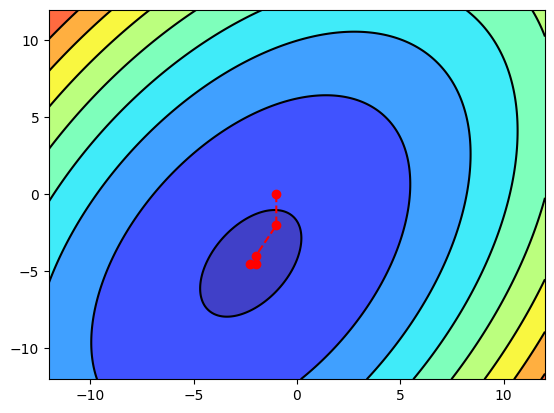

In [47]:
import matplotlib.pylab as pl
import numpy as np
import math


def norm(s1):
    return math.sqrt(s1[0]**2 + s1[1]**2)


def fun(dot):
    return 6*dot[0]**2-4*dot[0]*dot[1]+3*dot[1]**2+4*5**(1/2)*(dot[0]+2*dot[1])+22

def pointError(x, y):
    return norm([x[0] - y[0], x[1] - y[1]])/norm(y)

    
def funcError(x, y):
    return abs(fun(x) - fun(y))/abs(fun(y))
    
def h(x0, deltax, epsilon1, epsilon2):
    print ('Starting Hook-Jeeves...')
    xTB = [0,0]
    points = []
    
    n = 1
    
    while round(pointError(xTB, x0),3) > epsilon1: #or round(funcError(xTB, x0),3) > epsilon2:
        xTB = search(x0, deltax)
        
        while fun(xTB) < fun(x0):            
            print ('x%d: fun[%8.5f, %8.5f] = %8.5f' %(n, xTB[0], xTB[1], fun(xTB)))
            points.append(xTB)
                       
            if round(pointError(x0, xTB),3) < epsilon1: #and round(funcError(x0, xTB),3) < epsilon2:
                print (pointError(x0, xTB))
                print (funcError(x0, xTB))
                break
            
            xR = [2*xTB[0] - x0[0], 2*xTB[1] - x0[1]]
            print ('xR' + str(xR) + 'fun(xR)' + str(fun(xR)))
            
            if fun(xTB) < fun(x0):
                x0 = xTB[:]
                xTB = search(xR, deltax)
                
            n+=1         
            
        deltax[0] /= 2
        deltax[1] /= 2
        
    print ('END')  
    plot(points)
    # print points


def search(x0, deltax):
    x1 = [x0[0] + deltax[0], x0[1]]
    if fun(x0) > fun(x1):
        x0 = x1[:]
    x2 = [x0[0] - deltax[0], x0[1]]
    if fun(x0) > fun(x2):
        x0 = x2[:]
    x3 = [x0[0], x0[1] + deltax[1]]
    if fun(x0) > fun(x3):
        x0 = x3[:]
    x4 = [x0[0], x0[1] - deltax[1]]
    if fun(x0) > fun(x4):
        x0 = x4[:]
    return x0    
    
        
def plot(points):
    '''
        Plotting 2D function and way search
    '''
    n = 256
    x = np.linspace(-12, 12, n)
    y = np.linspace(-12, 12, n)
    X, Y = np.meshgrid(x, y)
    
    xs = []
    ys = []
    
    pl.contourf(X, Y, fun([X, Y]), 8, alpha=.75, cmap='jet')
    C = pl.contour(X, Y, fun([X, Y]), 8, colors='black', linewidth=.5) 
    
    for i in range(len(points)):
        xs.append(points[i][0])
        ys.append(points[i][1])
    
    pl.plot(xs, ys, marker='o', linestyle='--', color='r', label='Square')            
    
def main():
    h([-2, 1], [1, 1], 0.001, 0.001)
    #plot([[1,1]], 'yellow')
    


if __name__ == '__main__':
   main()  